In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

# Define label mapping
label_mapping = {
    'O': 0,
    'B_PER': 1,
    'I_PER': 2,
    'B_ORG': 3,
    'I_ORG': 4,
    'B_LOC': 5,
    'I_LOC': 6
}

reverse_label_mapping = {v: k for k, v in label_mapping.items()}

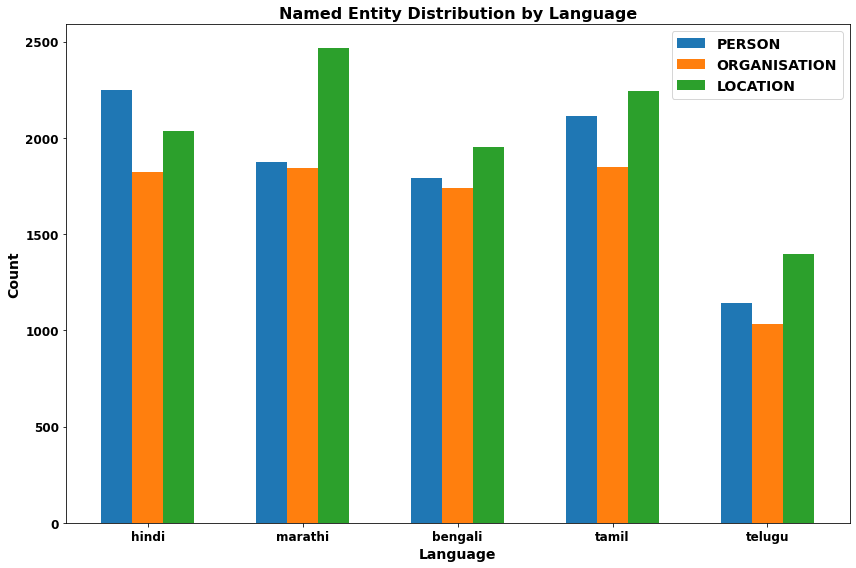

In [57]:
# Function to load dataset and count occurrences of PERSON, ORGANISATION, and LOCATION
def count_named_entities(lang):
    # Load dataset
    train_file = f"{lang}_train.json"
    test_file = f"{lang}_test.json"
    
    with open(train_file, 'r') as f:
        train_data = json.load(f)
    with open(test_file, 'r') as f:
        test_data = json.load(f)
    
    # Combine train and test datasets
    combined_data = train_data + test_data
    
    # Extract ner_tags from combined dataset
    ner_tags = [item['ner_tags'] for item in combined_data]
    
    # Flatten ner_tags list
    flattened_tags = [tag for sublist in ner_tags for tag in sublist]
    
    # Map labels to their corresponding names with fallback option
    labels = [reverse_label_mapping.get(tag, 'UNKNOWN') for tag in flattened_tags]
    
    # Count occurrences of PERSON, ORGANISATION, and LOCATION
    count_per = labels.count('B_PER')
    count_loc = labels.count('B_LOC')
    count_org = labels.count('B_ORG')
    
    return count_per, count_org, count_loc

# Load datasets and count named entities for each language
languages = ["hindi", "marathi", "bengali", "tamil", "telugu"]
counts = {lang: count_named_entities(lang) for lang in languages}

# Plot the class distribution
plt.figure(figsize=(12, 8))

bar_width = 0.2
index = np.arange(len(languages))

for i, entity in enumerate(['PERSON', 'ORGANISATION', 'LOCATION']):
    plt.bar(index + (i - 1) * bar_width, [counts[lang][i] for lang in languages], bar_width, label=entity)

plt.xlabel('Language', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')
plt.title('Named Entity Distribution by Language', fontsize=16, weight='bold')
plt.xticks(index, languages, fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.legend(fontsize=12, prop={'size': 14, 'weight': 'bold'})
plt.tight_layout()
plt.show()